<a href="https://colab.research.google.com/github/rachelfds/sarcasm-detection/blob/main/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_json("/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json", lines=True)
print(data.head())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


In [ ]:
data["is_sarcastic"] = data["is_sarcastic"].map({0: "Not Sarcasm", 1: "Sarcasm"})
print(data.head())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline is_sarcastic  
0  former versace store clerk sues over secret 'b...  Not Sarcasm  
1  the 'roseanne' revival catches up to our thorn...  Not Sarcasm  
2  mom starting to fear son's web series closest ...      Sarcasm  
3  boehner just wants wife to listen, not come up...      Sarcasm  
4  j.k. rowling wishes snape happy birthday in th...  Not Sarcasm  


In [ ]:
data = data[["headline", "is_sarcastic"]]
x = np.array(data["headline"])
y = np.array(data["is_sarcastic"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#accuracy
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8448146761512542


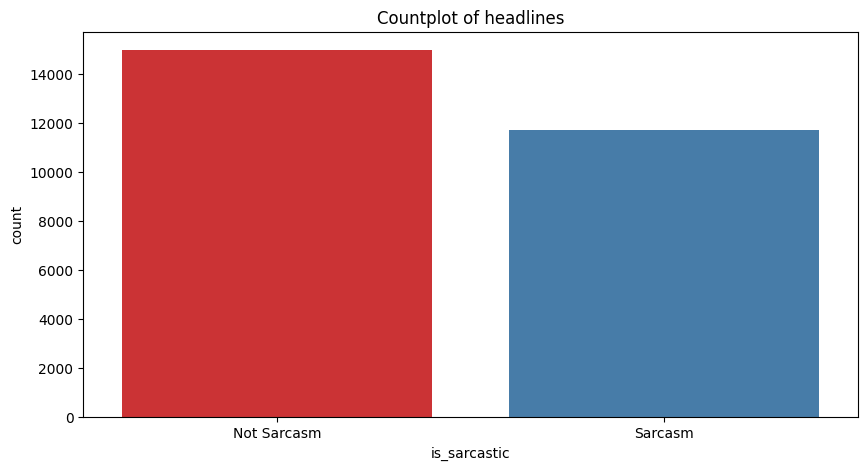

In [ ]:
# Check the dataset label balance or not

# Check number of headlines by is_sarcastics
plt.figure(figsize=(10, 5))
sns.countplot(x='is_sarcastic', data=data, palette="Set1").set_title(
	"Countplot of headlines")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


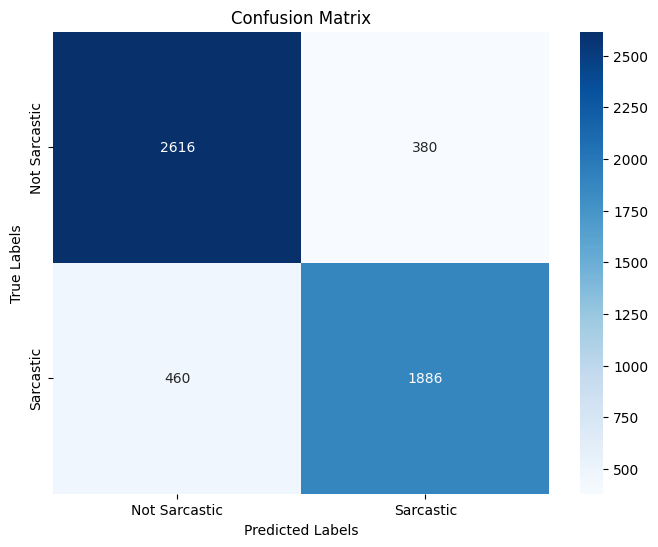

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (replace with your actual model training code)
model = LogisticRegression()  # Replace with your actual model
model.fit(X_train, y_train)

# Make predictions on the test set
pred_label = model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, pred_label)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: after careful consideration, bush recommends oil drilling
['Sarcasm']
